<center><img src="Logolink_OP_VVV_hor_barva_cz.jpg" width="600px"/></center>
<center>ESF projekt Západočeské univerzity v Plzni reg. č. CZ.02.2.69/0.0/0.0/16 015/0002287</center>

# Filtration and edge detection

Filtrace, detekce hran

-Hrana: Skoková změna hodnoty v jasu/barvě

-Cíl: Potlačení šumu

-průměrování přes více snímků

-lokální průměrování

    - rozostření hran -> velikost masky by měla být menší ne nejmenší detail, který chceme zachovat
    
Konvoluce

f(x,y) * h(x,y) = Sum(Sum(f(x-i,y-j).h(i,j)))

In [1]:
import scipy
import scipy.misc
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from scipy import ndimage
import skimage
import skimage.io
import skimage.filters
from skimage.morphology import disk

In [2]:
#konvoluce - full (default), same, valid
np.convolve([3, 10, 10, 1, 2, 2], [1, -2, -1], 'full')

array([  3,   4, -13, -29, -10,  -3,  -6,  -2])

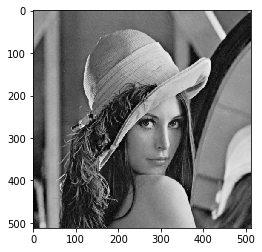

In [3]:
lena = skimage.io.imread('Lenna.png')
lena = skimage.color.rgb2gray(lena)
plt.imshow(lena, cmap='gray')
plt.show()

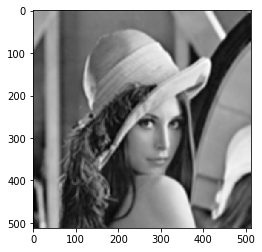

In [4]:
#uniform filter - rozostří hrany, ztratí detaily 
local_mean = ndimage.uniform_filter(lena, size=7)
plt.imshow(local_mean, cmap='gray')
plt.show()

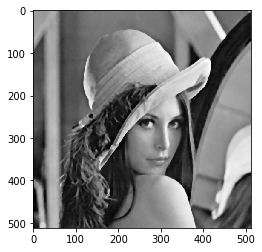

In [5]:
#median filter - řeší problém výskytu jedné nebo více vychýlených hodnot, je nelineární, porušuje tenké čáry a trhá rohy
med_denoised = ndimage.filters.median_filter(lena, 5)
plt.imshow(med_denoised, cmap='gray')
plt.show()

c:\python36\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


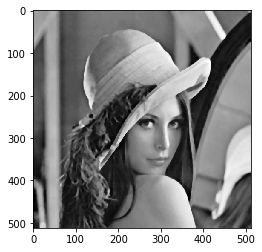

In [6]:
med_denoised2 = skimage.filters.rank.median(lena, disk(3))
plt.imshow(med_denoised2, cmap='gray')
plt.show()

In [7]:
a = disk(3)
print (a)

[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]


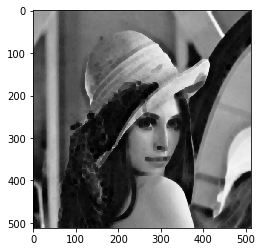

In [8]:
#avr filter
avr_denoised = ndimage.filters.percentile_filter(lena,0.5,7)
plt.imshow(avr_denoised, cmap='gray')
plt.show()

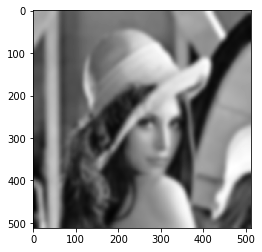

<Figure size 432x288 with 0 Axes>

In [9]:
#gaussovsky filtr, img, odchylka
blurred_lena = ndimage.filters.gaussian_filter(lena, sigma=5) 
plt.imshow(blurred_lena, cmap='gray')
plt.figure()
plt.show()

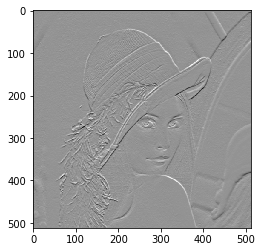

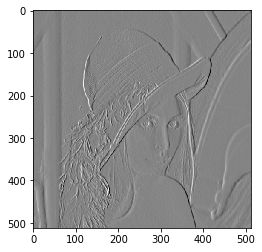

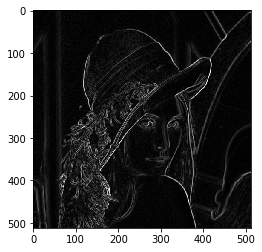

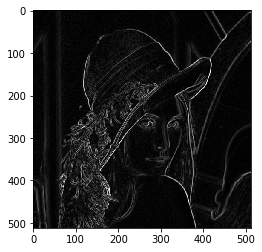

In [10]:
plt.show()
plt.figure()
dx = skimage.filters.sobel_h(lena) #horizontal derivate
plt.imshow(dx, cmap='gray')
plt.figure()
dy = skimage.filters.sobel_v(lena) #vertical derivate
plt.imshow(dy, cmap='gray')
plt.figure()
mag = np.hypot(dx, dy) #magnitude = sqrt(dx**2 + dy**2)
mag *= 255.0 / np.max(mag)
plt.imshow(mag, cmap='gray')
mag2 = skimage.filters.sobel(lena)
plt.figure()
plt.imshow(mag2, cmap='gray')
plt.show()

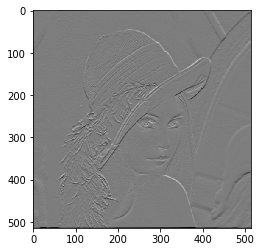

In [11]:
sobelX = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
dx2 = scipy.signal.convolve(lena,sobelX)
plt.imshow(dx2, cmap='gray')
plt.show()

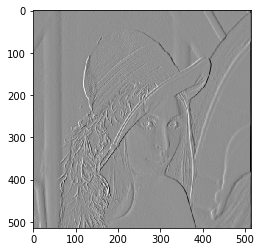

In [12]:
sobelY = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
dy2 = scipy.signal.convolve(lena,sobelY)
plt.imshow(dy2, cmap='gray')
plt.show()

In [13]:
print(sobelX)

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


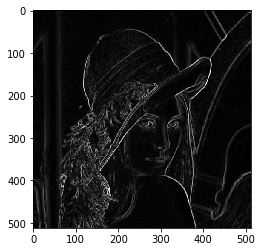

In [14]:
edge_prewitt = skimage.filters.prewitt(lena)
plt.imshow(edge_prewitt, cmap='gray')
plt.show()                                

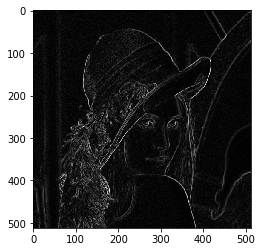

In [15]:
# Edge detector
edge_roberts = skimage.filters.roberts(lena)
plt.imshow(edge_roberts, cmap='gray')
plt.show()

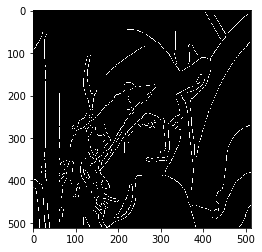

In [16]:
# Canny - based on the detivative of a Gaussian in order to compute the intesity of gradients.
from skimage import feature
edges2 = feature.canny(lena, sigma=3)
plt.imshow(edges2, cmap='gray')
plt.show()

In [17]:
def prumerovani(image, size):
    mask = np.ones([size[0], size[1]])
    mask = np.fliplr(np.flipud(mask))

    im2 = np.empty(image.shape, dtype=np.uint8)
    imageE = np.zeros([image.shape[0] + mask.shape[0] - 1, image.shape[1] + mask.shape[1] - 1])
    imageE[1:image.shape[0] + 1, 1:image.shape[1] + 1] = image
    for i in range(imageE.shape[0]-mask.shape[0] + 1):
        for j in range(imageE.shape[1]-mask.shape[1] + 1):
            im2[i, j] = np.uint8(np.sum(imageE[i:i + mask.shape[0], j:j + mask.shape[1]] * mask) / np.double(np.sum(mask)))
        
    return im2

In [18]:
def median(image, size):
    im2 = np.empty(image.shape, dtype=np.uint8)
    imageE = np.zeros([image.shape[0] + 2, image.shape[1] + 2])
    imageE[1:image.shape[0] + 1, 1:image.shape[1] + 1] = image
    for i in range(int(imageE.shape[0] - size[0] + 1)):
        for j in range(int(imageE.shape[1]- size[1] + 1)):
            im2[i, j] = np.median(imageE[i:i + size[0], j:j + size[1]])
        
    return im2

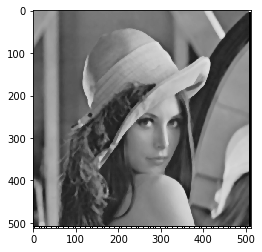

In [19]:
prumer1 = median(lena*255, [7,7])
plt.imshow(prumer1, cmap='gray')
plt.show()